<h1>Titanic Disaster Survival Using Logistic Regression</h1>

The task is to predict the survival on the Titanic based on the dataset of the onboard passengers of the historical journey embarked on April 15, 1912. The features include Gender, Age, Passenger class, Ticket Fare, Port of Embarkation, Family, etc. It requires a binary classification of 1/0, 1 meaning Survived and 0 meaning not survived.

In [1]:
#import necessary libraries

#data analysis libraries
import pandas as pd
import numpy as np

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore') 

## The Data

Reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
len(train)

891

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Explaining Dataset ###

**survival** : Survival 0 = No, 1 = Yes <br>
**pclass** : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd <br>
**sex** : Sex of the passenger travelling <br>
**Age** : Age in years <br>
**sibsp** : Number of siblings / spouses aboard the Titanic <br>
**parch** :Number of parents / children aboard the Titanic <br>
**ticket** : Ticket number fare Passenger fare cabin Cabin number <br>
**embarked** : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton <br>


### Features Description ###

**Numerical Features**: Age (Continuous), Fare (Continuous),SibSp (Discrete),Parch (Discrete)

**Categorical Features**: Survived, Sex, Embarked, Pclass

**Alphanumeric Features**: Ticket, Cabin


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Some Observations:**

1)There are a total of 891 passengers in our training set.
2)The Age feature is missing approximately 19.8% of its values,the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.

3)The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.

4)The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

# Exploratory Data Analysis

We'll start Exploratory Data Analysis by checking out missing data!

## Missing Data

Using seaborn to create a simple heatmap to see where we are missing data.

In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

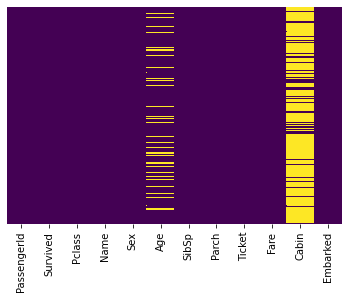

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


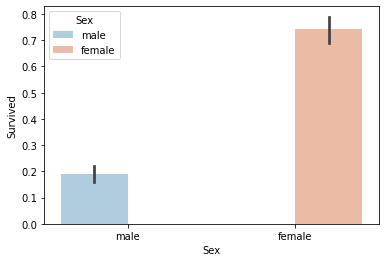

In [9]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train,hue='Sex',palette='RdBu_r')

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)


**Observation**- Females have a much higher chance of survival than males. The Sex feature is essential in our predictions.

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


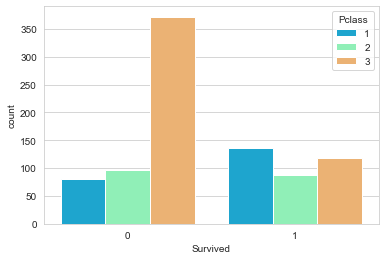

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

**Observation**-People with higher socioeconomic class had a higher rate of survival.

<AxesSubplot:>

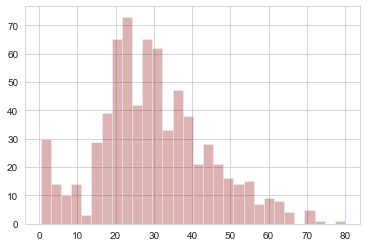

In [11]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

**Observation**- Most of the passengers are in the age range between 17-30,least passenger with elder ages

<AxesSubplot:xlabel='SibSp', ylabel='count'>

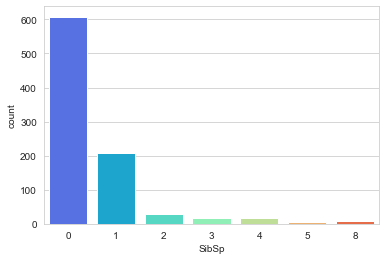

In [12]:
sns.countplot(x='SibSp',data=train,palette='rainbow')

**Observation**-Around 600 passengers who are travelling without any siblings or spouse

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

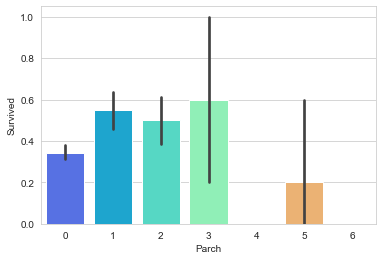

In [13]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train,palette='rainbow')

**Observation**-People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can check the average age by passenger class.


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

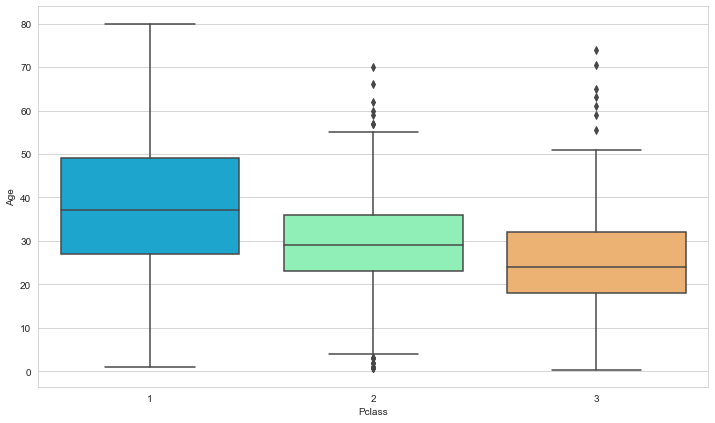

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow')

**Observation**-We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

### Age-Missing values ###

In [15]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))

Percent of missing "Age" records is 19.87%


   ~20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

In [16]:
#creating a function 
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

let's check that heat map again!

<AxesSubplot:>

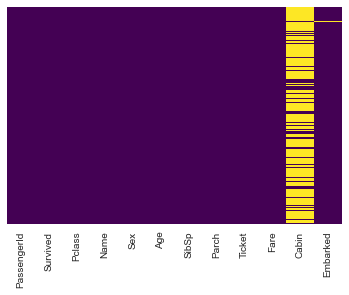

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


   There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


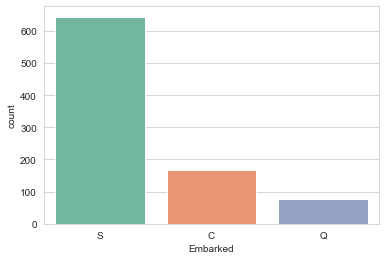

In [20]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train, palette='Set2')
plt.show()

In [21]:
print('The most common boarding port of embarkation is %s.' %train['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


**Observation**-By far the most passengers boarded in Southhampton, so we'll impute those 2 NaN's w/ "S".

Let's go ahead and drop the 'Cabin' variable 

In [22]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

In [23]:
train.drop('Cabin',axis=1,inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
train.dropna(inplace=True)

### Correlation ###
We have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the
correlation matrix as a heatmap.

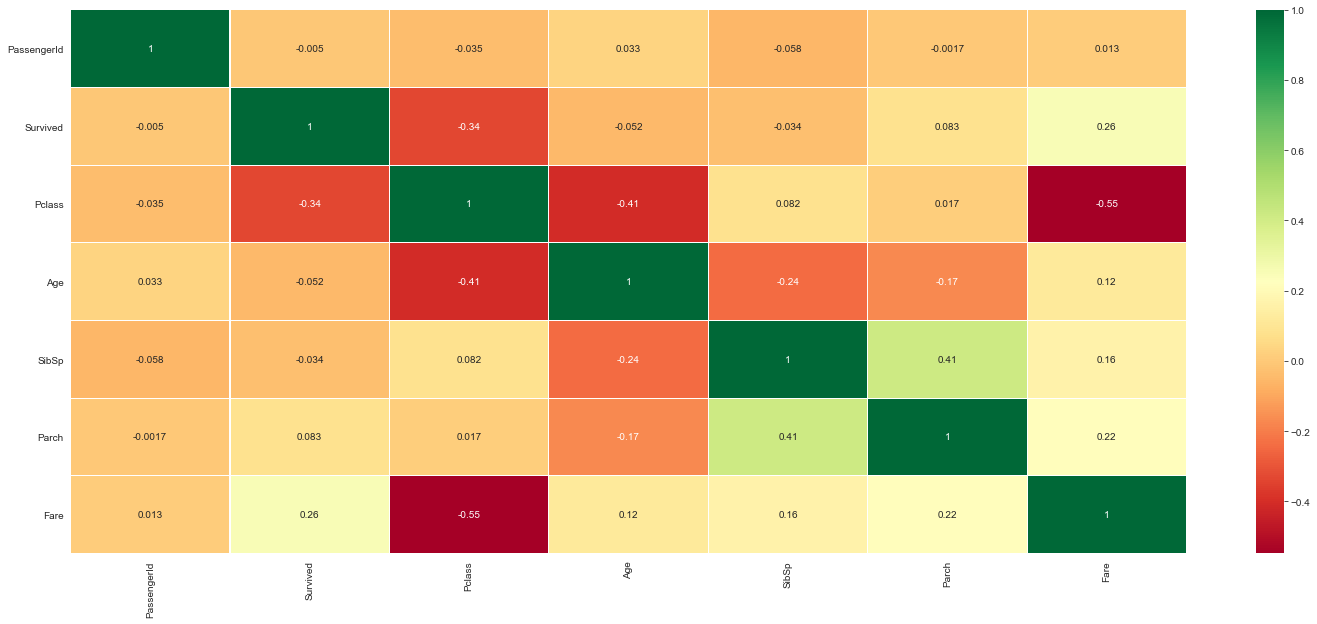

In [26]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.show()

**Observation**-From heatmap we can observe that 'SibSp' and 'Parch' is highly correlated.

## Converting Categorical Features 

We need to convert categorical features to dummy variables using pandas,Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [28]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [30]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
train = pd.concat([train,sex,embark],axis=1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1




# Building a Logistic Regression model

Splitting our data into a training set and test set.

## Train Test Split

In [34]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [35]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [40]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix


array([[150,  13],
       [ 39,  65]], dtype=int64)

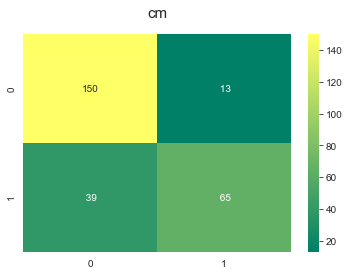

In [42]:
cm = confusion_matrix(y_test,predictions)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='3.0f',cmap="summer")
plt.title('cm', y=1.05, size=15)
cm

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8052434456928839

In [45]:
print(logmodel.score(X_test,y_test))
predictions = logmodel.predict(X_test)
print("Survived", sum(predictions!=0))
print("NOT Survived", sum(predictions==0))

0.8052434456928839
Survived 78
NOT Survived 189


In [46]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

## Evaluation

We can check precision,recall,f1-score using classification report!

In [47]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       163
           1       0.83      0.62      0.71       104

    accuracy                           0.81       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.81      0.81      0.80       267



**Precision is fine considering Model Selected and Available Data. Accuracy can be increased by further using more features or  by using other model**

**Note:** <br>
Precision : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations <br>
Recall : Recall is the ratio of correctly predicted positive observations to the all observations in actual class
F1 score - F1 Score is the weighted average of Precision and Recall.